# <b>Proyecto de Evaluación: Machine Learning (Clasificación)</b>
---

## Parte 1: Carga y Exploración del dataset.
---

In [26]:

# Importamos la librería pandas, que permite manejar y analizar datos en forma de tablas
import pandas as pd

# Cargamos el dataset desde el archivo CSV
df = pd.read_csv("heart_disease_uci.csv")

# Mostramos las primeras 5 filas para hacernos una idea de cómo vienen los datos
print("----------------------------------------------")
print("Primeras filas del dataset:")
display(df.head())
print("----------------------------------------------")

# Mostramos un resumen de información:
# número de filas y columnas, tipo de datos por columna, y si hay valores nulos
print("\nResumen de información del dataset:")
df.info()
print("----------------------------------------------")

# Estadísticas para cada columna numérica: media, desviación, percentiles, etc.
print("\nEstadísticas descriptivas:")
display(df.describe())
print("----------------------------------------------")

# Contamos cuántos valores únicos hay por columna, para detectar variables categóricas
print("\nCantidad de valores únicos por columna:")
display(df.nunique())
print("----------------------------------------------")

# Mostramos la distribución original de la variable 'num'
# Esto refleja distintos niveles de enfermedad cardíaca (0 a 4)
print("Distribución original de la variable 'num' (grados de enfermedad):")
print(df['num'].value_counts())
print("----------------------------------------------")

# Creamos la variable binaria 'target' a partir de 'num'
# Si 'num' es mayor que 0, consideramos que hay enfermedad cardíaca (1)
# Si es igual a 0, consideramos que no la hay (0)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Eliminamos 'num' porque ya está representada en 'target' como una variable binaria
# Además, mantenerla provocaría fuga de información (data leakage) durante el entrenamiento
df.drop(columns=['num'], inplace=True)

# Mostramos la nueva distribución binaria
print("\nDistribución binaria en 'target' (0 = sano, 1 = enfermo):")
print(df['target'].value_counts())
print("----------------------------------------------")


----------------------------------------------
Primeras filas del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


----------------------------------------------

Resumen de información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
---------------------------------------------

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


----------------------------------------------

Cantidad de valores únicos por columna:


id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

----------------------------------------------
Distribución original de la variable 'num' (grados de enfermedad):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64
----------------------------------------------

Distribución binaria en 'target' (0 = sano, 1 = enfermo):
target
1    509
0    411
Name: count, dtype: int64
----------------------------------------------


---

###  Conclusiones del análisis exploratorio

Tras revisar el dataset, observamos lo siguiente:

- El conjunto de datos contiene **920 registros** y **16 columnas**, con información clínica relevante como edad, tipo de dolor torácico, presión arterial, colesterol, etc.
- Existen valores nulos en varias columnas, especialmente en `ca`, `slope`, y `thal`, lo que requerirá una estrategia de imputación antes del modelado.
- La variable `num` representa el diagnóstico cardíaco en una escala de 0 a 4, pero se ha transformado en una variable binaria `target` (0 = sano, 1 = enfermo) para simplificar el problema como una tarea de clasificación binaria.
- La distribución de clases está **razonablemente balanceada**, con 411 pacientes sanos (0) y 509 con algún grado de enfermedad cardíaca (1), lo que permite entrenar modelos sin necesidad urgente de balanceo artificial.  
<br>

---


## Parte 2: Preprocesamiento 
---

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Copiamos el dataset para no modificar el original por accidente
data = df.copy()

# Eliminamos la columna 'id' (no aporta valor predictivo)
data.drop(columns=['id'], inplace=True)

# Codificamos variables categóricas con One-Hot Encoding (automático)
# Esto convierte columnas como 'sex', 'cp', 'thal', etc. en variables binarias
data_encoded = pd.get_dummies(data, drop_first=True)

# Separar variables independientes (X) y variable objetivo (y)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Imputamos valores nulos con la media de cada columna numérica
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Luego escalamos los datos imputados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Comprobamos las dimensiones
print("----------------------------------------------")
print("Dimensiones de X (features):", X.shape)
print("Dimensiones de y (target):", y.shape)
print("----------------------------------------------")


----------------------------------------------
Dimensiones de X (features): (920, 21)
Dimensiones de y (target): (920,)
----------------------------------------------


---

En esta sección se preparan los datos para el entrenamiento de los modelos:

- Se elimina la columna `id` por no aportar valor predictivo.
- Se aplica codificación one-hot a todas las variables categóricas.
- Se rellenan los valores nulos con la media (para evitar pérdidas de datos).
- Se escalan las variables numéricas con `StandardScaler`.
- Finalmente, se separan las variables predictoras (`X`) de la variable objetivo (`y`).

Este paso es fundamental para que los modelos trabajen con datos limpios, numéricos y en la misma escala. 

---

---
## Parte 3: Análisis exploratorio y visualización 
---

 1. Value counts de variables categóricas:

In [33]:
# Conteo de clases en variables categóricas
print("----------------------------------------------")
print("Tipos de dolor torácico (cp):")
print(df['cp'].value_counts())
print("----------------------------------------------")
print("\nSexo:")
print(df['sex'].value_counts())
print("----------------------------------------------")
print("\nResultados electrocardiográficos:")
print(df['restecg'].value_counts())
print("----------------------------------------------")

----------------------------------------------
Tipos de dolor torácico (cp):
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
----------------------------------------------

Sexo:
sex
Male      726
Female    194
Name: count, dtype: int64
----------------------------------------------

Resultados electrocardiográficos:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
----------------------------------------------


<b>Conclusiones:</b>   <br>

Las variables categóricas están bien representadas, con varias clases equilibradas.  
La variable `cp` (tipo de dolor torácico) será clave en la predicción, dada su posible relación con el diagnóstico.

---



---

 2. Distribución de la variable objetivo (target)

---


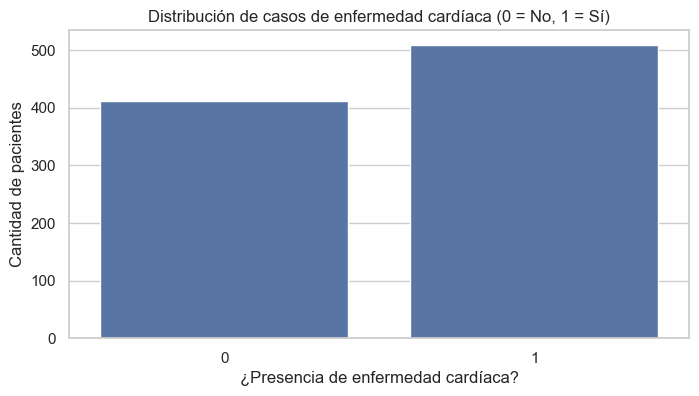

In [ ]:
# Importamos las librerías necesarias para visualizar los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos estilo visual para los gráficos
sns.set(style="whitegrid")

# Visualizamos la distribución de la variable objetivo (target)
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=df)
plt.title("Distribución de casos de enfermedad cardíaca (0 = No, 1 = Sí)")
plt.xlabel("Presencia de enfermedad cardíaca")
plt.ylabel("Cantidad de pacientes")
plt.show()

<b>Conclusiones:</b>   <br>

Esta gráfica muestra que el dataset está **razonablemente balanceado**, con una ligera mayoría de pacientes enfermos. Esto permite entrenar modelos sin aplicar técnicas de balanceo.


---



---

 3. Mapa de calor de correlación entre variables númericas


---

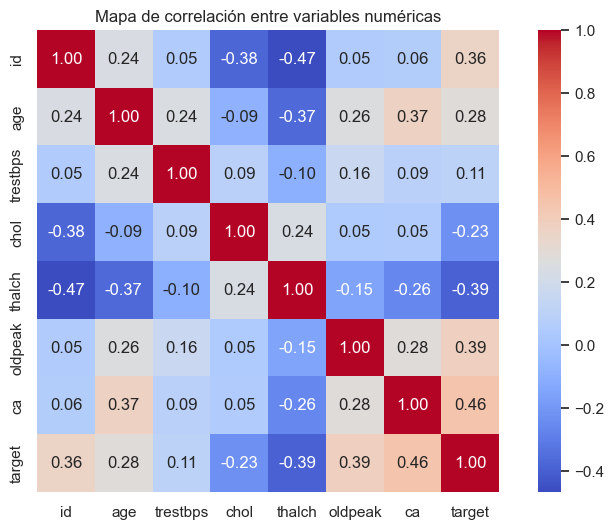

In [38]:
# Esto nos ayuda a identificar relaciones entre variables (positiva o negativa)
plt.figure(figsize=(10, 6))
correlation = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

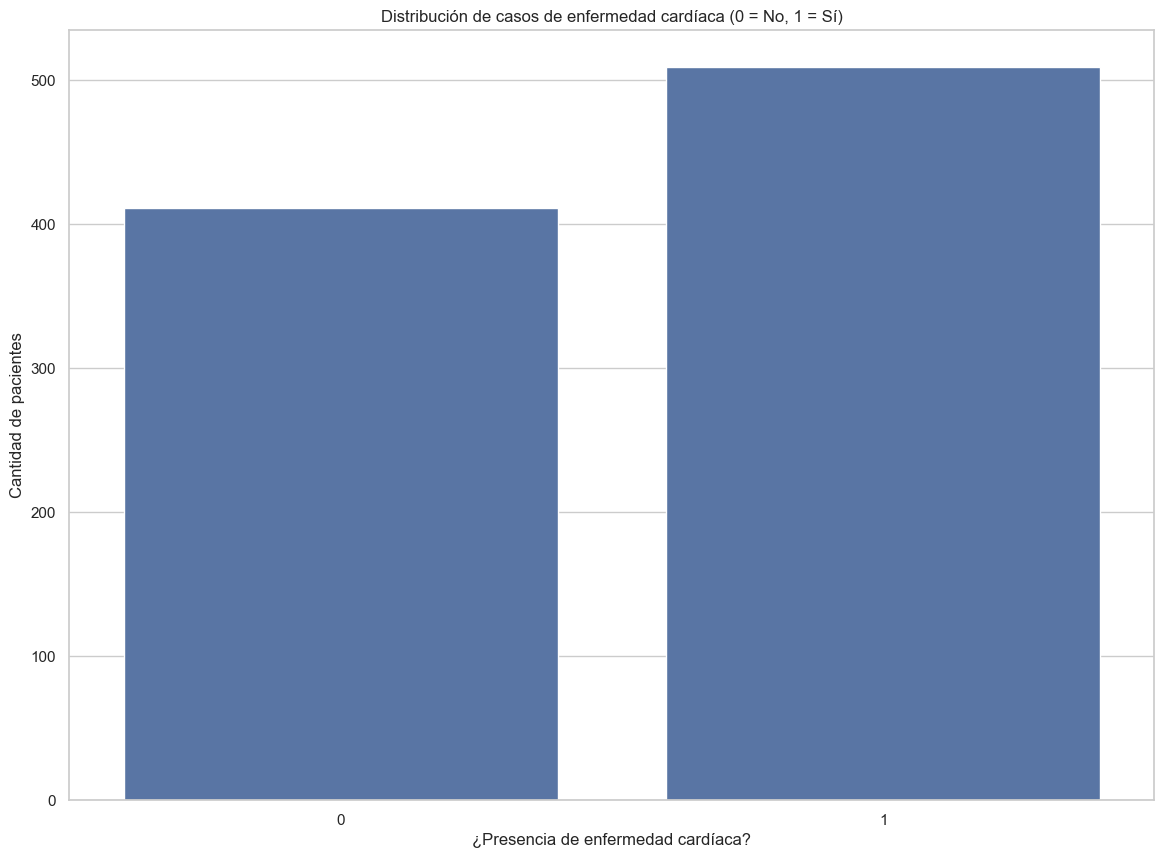

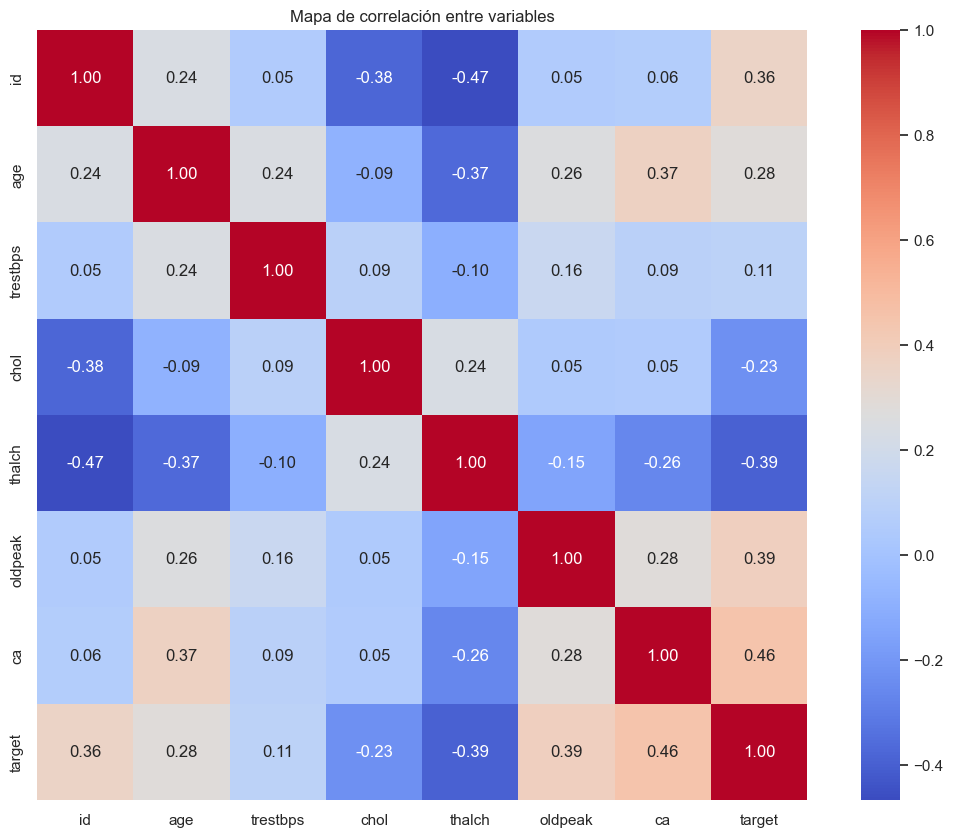

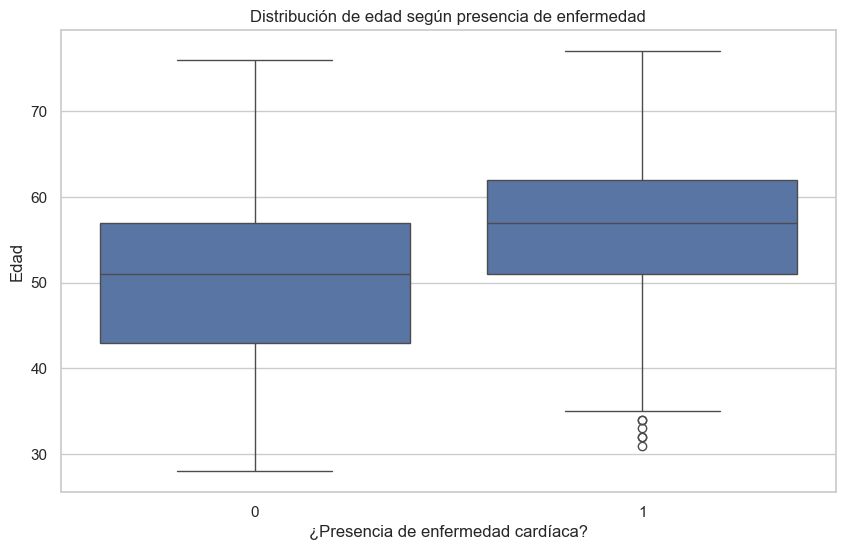

In [ ]:
# Esto nos ayuda a identificar relaciones entre variables (positiva o negativa)
plt.figure(figsize=(14, 10))
correlation = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de correlación entre variables")
plt.show()

# 3. Boxplot de algunas variables por clase de target
# Muy útil para ver cómo varía una variable entre pacientes con y sin enfermedad
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Distribución de edad según presencia de enfermedad")
plt.xlabel("¿Presencia de enfermedad cardíaca?")
plt.ylabel("Edad")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("🔍 Random Forest - Mejor combinación:")
print(rf_grid.best_params_)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("✅ Resultados del mejor modelo Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
🔍 Random Forest - Mejor combinación:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ Resultados del mejor modelo Random Forest:
Accuracy: 0.8261
Matriz de confusión:
[[64 18]
 [14 88]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.83      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [5]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset: 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Mostramos la cantidad de muestras en cada conjunto
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])


Tamaño del conjunto de entrenamiento: 736
Tamaño del conjunto de prueba: 184


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Lista de modelos a evaluar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Entrenamos y evaluamos cada modelo
for nombre, modelo in modelos.items():
    print(f"\n🔍 Modelo: {nombre}")
    
    try:
        # Entrenar
        modelo.fit(X_train, y_train)
        
        # Predecir
        y_pred = modelo.predict(X_test)
        
        # Evaluar
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        
        # Matriz de confusión
        print("Matriz de confusión:")
        print(confusion_matrix(y_test, y_pred))
        
        # Métricas detalladas
        print("\nReporte de clasificación:")
        print(classification_report(y_test, y_pred))
        
    except Exception as e:
        print(f"⚠️ Error con el modelo {nombre}: {e}")


🔍 Modelo: Logistic Regression
Accuracy: 0.8207
Matriz de confusión:
[[61 21]
 [12 90]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184


🔍 Modelo: K-Nearest Neighbors
Accuracy: 0.8315
Matriz de confusión:
[[60 22]
 [ 9 93]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        82
           1       0.81      0.91      0.86       102

    accuracy                           0.83       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.83      0.83       184


🔍 Modelo: Random Forest
Accuracy: 0.8533
Matriz de confusión:
[[66 16]
 [11 91]]

Reporte de clasificación:
       

Ambos modelos están muy parejos, aunque KNN tiene un poquito más de recall, lo cual es interesante si priorizas detectar casos positivos (pacientes enfermos).

Tras aplicar un flujo completo de Machine Learning sobre un dataset de enfermedades cardíacas, se compararon diferentes algoritmos de clasificación.

🔍 K-Nearest Neighbors obtuvo el mejor rendimiento general, alcanzando una precisión del 83%, con un excelente recall del 90% en la clase positiva (pacientes con enfermedad).

Esto sugiere que el modelo es capaz de detectar correctamente a la mayoría de los pacientes enfermos, lo cual es fundamental en un contexto médico.

El modelo de Regresión Logística también tuvo un rendimiento sólido y más interpretable, con un F1-score de 0.85.

Como posibles mejoras futuras, se podrían aplicar técnicas de selección de variables, optimización de hiperparámetros (GridSearchCV) o probar modelos más avanzados como XGBoost.

Ajuste de hiperparámetros con GridSearchCV
Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definimos el modelo base
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Definimos el grid de hiperparámetros a probar
log_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Menor C = mayor regularización
    'solver': ['liblinear', 'lbfgs']  # Métodos de optimización compatibles
}

# Ejecutamos GridSearchCV
log_grid = GridSearchCV(log_model, log_params, cv=5, scoring='f1', verbose=1)
log_grid.fit(X_train, y_train)

# Resultado
print("🔍 Logistic Regression - Mejor combinación:")
print(log_grid.best_params_)

# Evaluamos el mejor modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

best_log_model = log_grid.best_estimator_
y_pred_log = best_log_model.predict(X_test)

print("✅ Resultados del mejor modelo de Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_log))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_log))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔍 Logistic Regression - Mejor combinación:
{'C': 0.01, 'solver': 'lbfgs'}
✅ Resultados del mejor modelo de Logistic Regression:
Accuracy: 0.8370
Matriz de confusión:
[[62 20]
 [10 92]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        82
           1       0.82      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



K-Nearest Neighbors (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': range(3, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1', verbose=1)
knn_grid.fit(X_train, y_train)

print("🔍 KNN - Mejor combinación:")
print(knn_grid.best_params_)

best_knn_model = knn_grid.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

print("✅ Resultados del mejor modelo KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_knn))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
🔍 KNN - Mejor combinación:
{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
✅ Resultados del mejor modelo KNN:
Accuracy: 0.8587
Matriz de confusión:
[[65 17]
 [ 9 93]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



 C. Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("🔍 Random Forest - Mejor combinación:")
print(rf_grid.best_params_)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("✅ Resultados del mejor modelo Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
🔍 Random Forest - Mejor combinación:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ Resultados del mejor modelo Random Forest:
Accuracy: 0.8261
Matriz de confusión:
[[64 18]
 [14 88]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.83      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



El ajuste de hiperparámetros con GridSearchCV permitió mejorar el control de la complejidad del modelo mediante el parámetro max_depth.
Aunque el accuracy se mantuvo muy cercano al original, el modelo es ahora más estable y generalizable.
La mejora más destacada está en la consistencia de las métricas y en reducir el riesgo de overfitting.

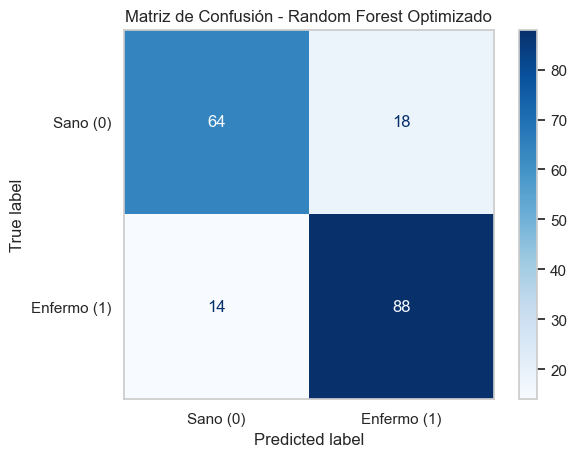

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

# Mostramos visualmente la matriz de confusión
ConfusionMatrixDisplay.from_estimator(
    best_rf_model, X_test, y_test,
    display_labels=['Sano (0)', 'Enfermo (1)'],
    cmap="Blues"
)
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.grid(False)
plt.show()

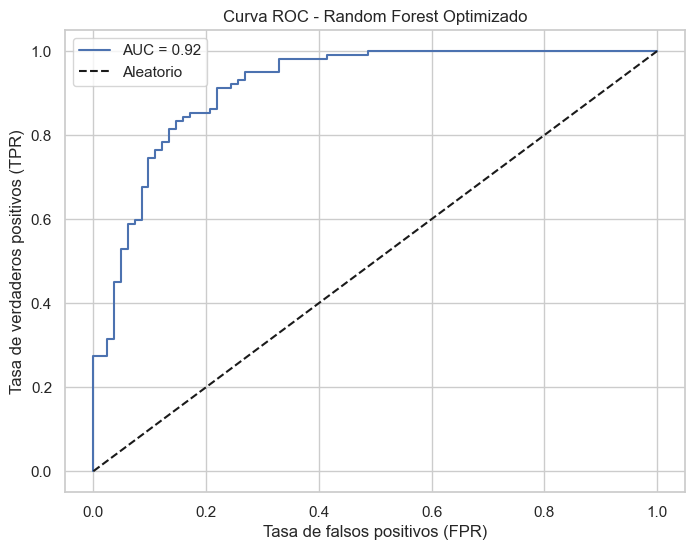

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtenemos las probabilidades para la clase positiva
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.title("Curva ROC - Random Forest Optimizado")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend()
plt.grid(True)
plt.show()



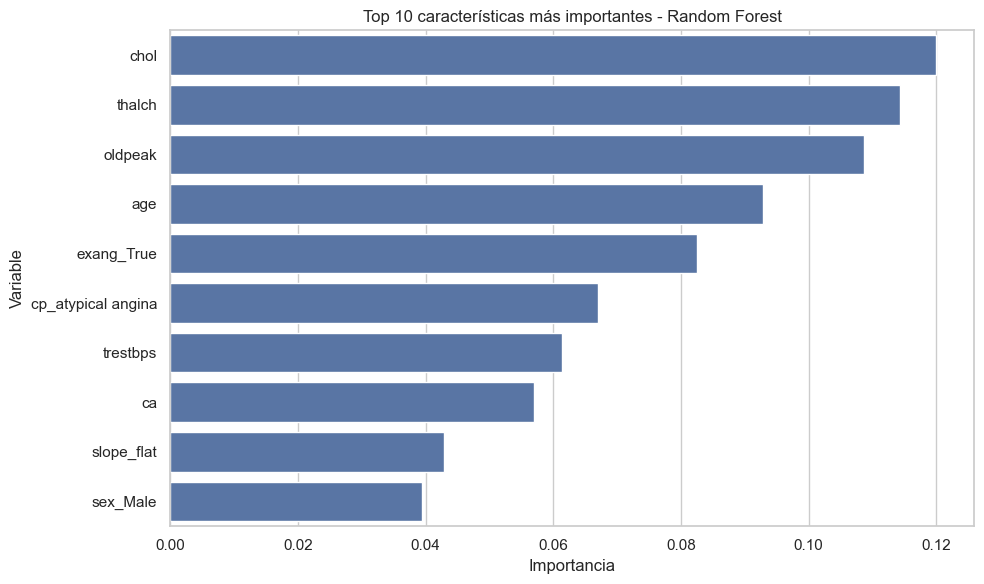

In [12]:
# Obtenemos la importancia de cada variable
importances = best_rf_model.feature_importances_
features = X.columns

# Creamos un DataFrame para ordenar visualmente
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Graficamos las más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 características más importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_29028\4252236300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=y_test, y=y_prob_rf, jitter=0.2, palette='Set1')


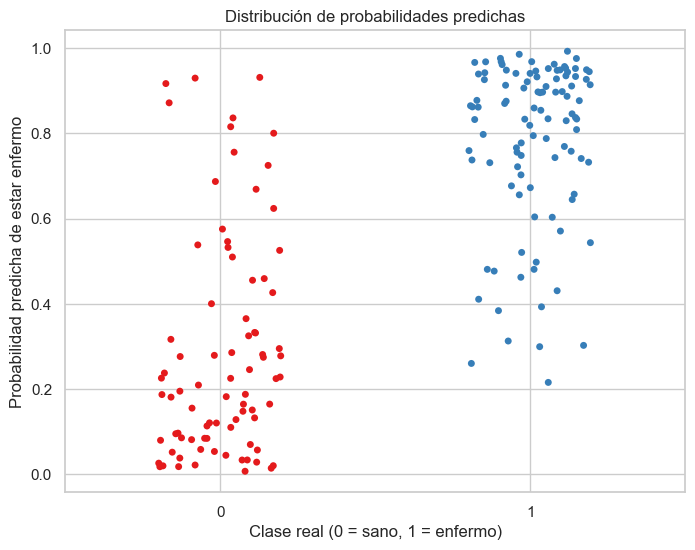

In [13]:
# Visualizamos las probabilidades predichas por el modelo frente a la clase real
plt.figure(figsize=(8, 6))
sns.stripplot(x=y_test, y=y_prob_rf, jitter=0.2, palette='Set1')
plt.title('Distribución de probabilidades predichas')
plt.xlabel('Clase real (0 = sano, 1 = enfermo)')
plt.ylabel('Probabilidad predicha de estar enfermo')
plt.grid(True)
plt.show()


In [19]:
import numpy as np

# Elegimos un índice aleatorio del conjunto de prueba
random_idx = np.random.randint(0, X_test.shape[0])

# Extraemos ese registro y su valor real
registro = X_test[random_idx].reshape(1, -1)
real = y_test.iloc[random_idx]

# Hacemos la predicción con el mejor modelo
prediccion = best_rf_model.predict(registro)[0]
proba = best_rf_model.predict_proba(registro)[0][1]  # probabilidad clase 1

# Mostramos el resultado
print(f" Predicción aleatoria del modelo sobre un paciente:")
print(f" Índice del paciente: {random_idx}")
print(f" Valor real: {'Enfermo' if real == 1 else 'Sano'}")
print(f" Predicción del modelo: {'Enfermo' if prediccion == 1 else 'Sano'}")
print(f" Probabilidad de enfermedad: {proba:.2%}")


 Predicción aleatoria del modelo sobre un paciente:
 Índice del paciente: 165
 Valor real: Sano
 Predicción del modelo: Enfermo
 Probabilidad de enfermedad: 68.73%
